# Biblioteca **Plotly** para Análise Exploratória de Dados (EDA)

A Análise da Personalidade do Cliente é uma análise detalhada dos clientes ideais de uma empresa. Ajuda uma empresa a compreender melhor os seus clientes e facilita-lhes a modificação de produtos de acordo com as necessidades, comportamentos e preocupações específicas dos diferentes tipos de clientes.

Fonte e dicionário dos dados, acesso no Kaggle: [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?resource=download)

In [ ]:
import pandas as pd
import plotly.offline as py ## faz os gráficos aparecerem na tela
import plotly.graph_objs as go ## cria os gráficos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = '/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv'
df = pd.read_csv(url, sep='\\t', engine='python')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

O gráfico de linha que vamos plotar representa o salário médio dos clientes que chegaram na empresa em cada um dos meses de 2013. Antes disso, precisamos tratar a coluna ‘Dt_Customer’ como sendo uma coluna de data. Além disso, vamos criar novas colunas com os anos, meses e dias.

In [ ]:
# tratando as datas
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# criando novas colunas
df['Year_Customer'] = df['Dt_Customer'].dt.year
df['Month_Customer'] = df['Dt_Customer'].dt.month
df['Day_Customer'] = df['Dt_Customer'].dt.day

# criando uma Series onde o index é o mês e o valor é o avg_income
data = df[df['Year_Customer'] == 2013].groupby('Month_Customer').mean()['Income']

# definindo as variáveis
months = data.index
avg_income = data.values ## salário médio por cada mês

<ipython-input-62-63f2690a4808>:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

<ipython-input-62-63f2690a4808>:10: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



### **Gráfico de Linha**

O plotly tem uma peculiaridade quando trata-se de gráfico de linha. Os gráficos de linha do plotly nada mais são que gráficos de dispersão onde os pontos são conectados por uma linha reta.

Vamos plotar 3 gráficos diferentes para mostrar na prática.

#### Gráfico 1

In [85]:
# criando o gráfico com o graph_objs
line1 = go.Scatter(x=months, y=avg_income, mode='lines', name='Ligado por linha') ## ligando os pontos com uma linha reta

# definindo o layout
layout = go.Layout(title = "Salário médio dos clientes que entraram nos meses de 2013",
                   xaxis = {'title':'Mês'},
                   yaxis = {'title':'Salário Médio'})
# criando a figura
fig = go.Figure(data=[line1], layout=layout)

# plotando o gráfico
py.iplot(fig)

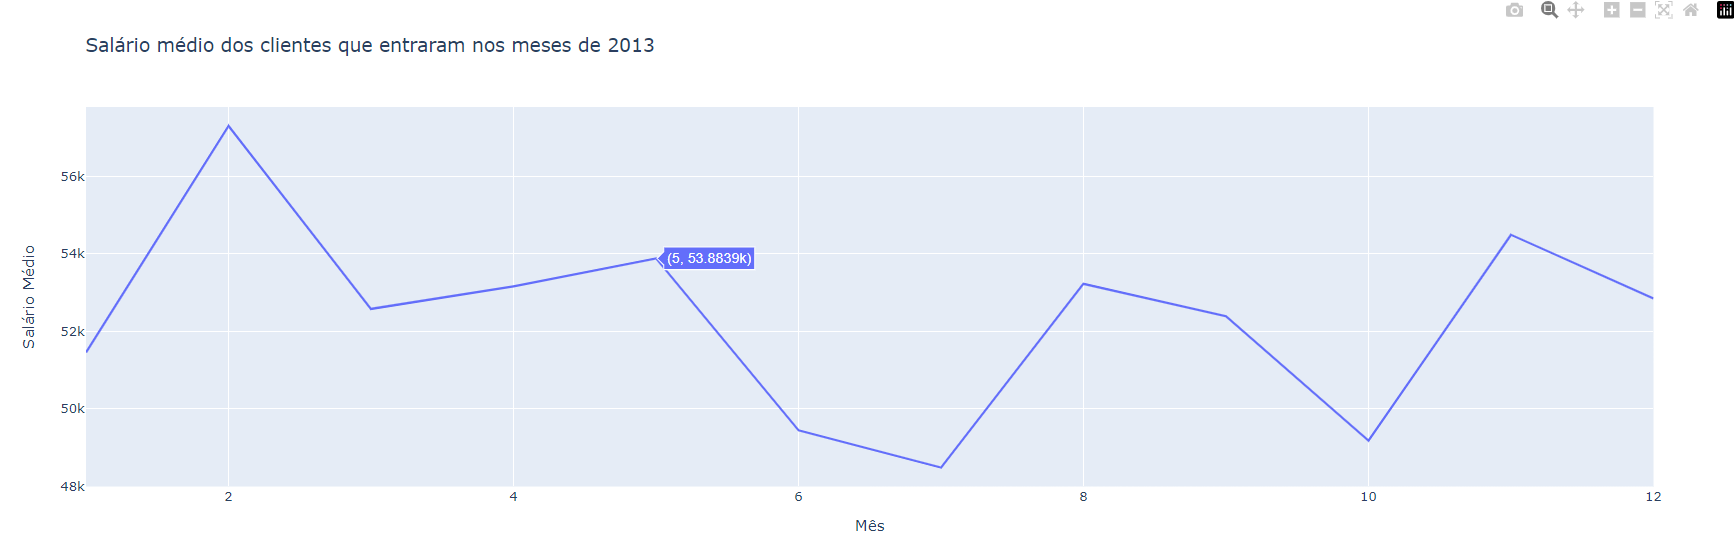

#### Gráfico 2

In [ ]:
# criando o gráfico com o graph_objs
line1 = go.Scatter(x=months, y=avg_income, mode='markers', name='Ligado por linha') ## transformando em um gráfico de dispersão

# definindo o layout
layout = go.Layout(title = "Salário médio dos clientes que entraram nos meses de 2013",
                   xaxis = {'title':'Mês'},
                   yaxis = {'title':'Salário Médio'})
# criando a figura
fig = go.Figure(data=[line1], layout=layout)

# plotando o gráfico de dispersão
py.iplot(fig)

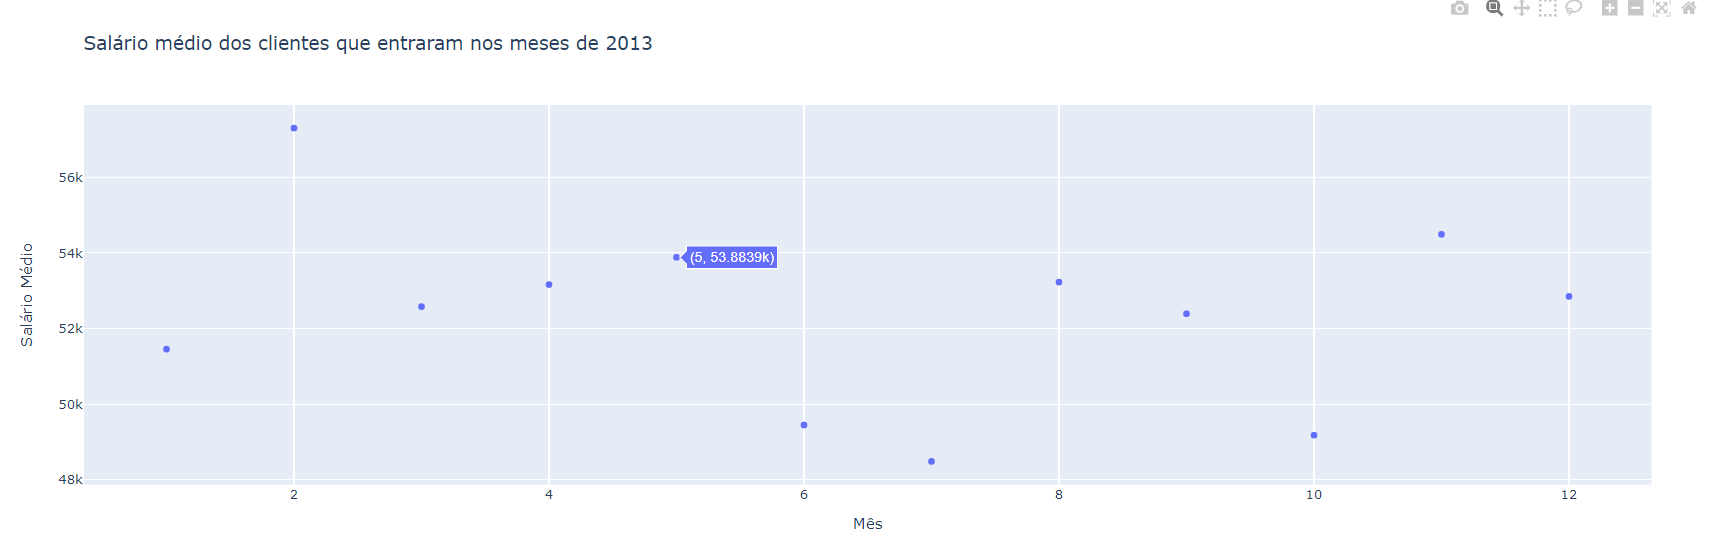

#### Gráfico 3

In [ ]:
# criando o gráfico com o graph_objs - Pontilhado
pontilhado = go.Scatter(x = [2019,2020,2021,2022,2023], y = [60e4,90e4,100e4,80e4,101e4], mode='lines',
                        line = {'color':'#999932','dash':'dot'}, name = "Pontilhado")

# criando o gráfico com o graph_objs - Tracejado
tracejado = go.Scatter(x = [2019,2020,2021,2022,2023], y = [30e4,50e4,10e4,35e4,42e4], mode='lines',
                        line = {'color':'#100032','dash':'dash'}, name = "Tracejado")

# definindo o layout
layout = go.Layout(title = "Faturamento por ano da Empresa X",
                   xaxis = {'title':'Ano'},
                   yaxis = {'title':'Faturamento'})
# criando a figura
fig = go.Figure(data=[pontilhado, tracejado], layout = layout) ## recebe lista de objetos

# plotando o gráfico de dispersão
py.iplot(fig)

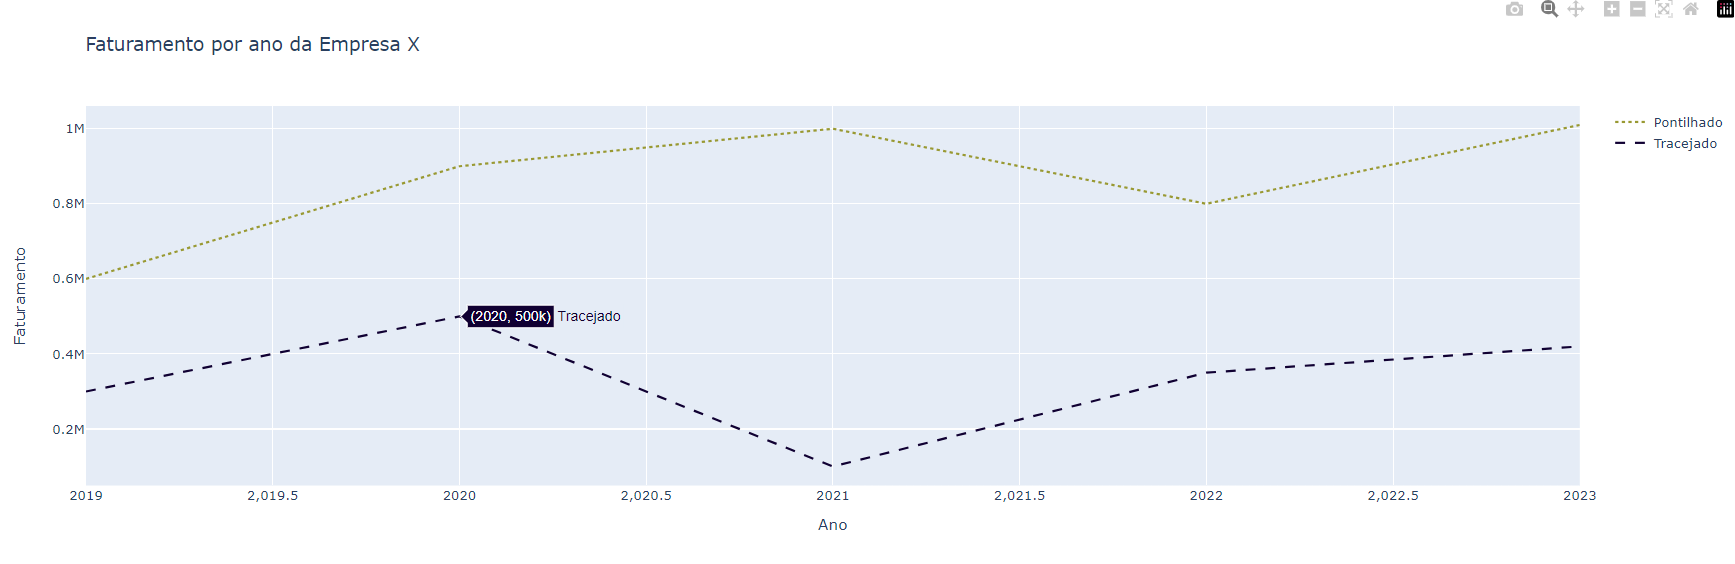

### **Gráfico de Dispersão**



Uma particularidade do plotly é que você realmente pode mudar qualquer coisa no gráfico que você queira: *a fonte do texto, o tamanho, a cor dos gráficos, adicionar subtítulos, cores de fundo e várias outras coisas*.

In [ ]:
# visualizando todos os parâmetros que o plotly possui
go.Scatter

plotly.graph_objs._scatter.Scatter

O gráfico abaixo será uma relação entre o salário e o ano de nascimento do cliente.

In [ ]:
# criando o gráfico com o graph_objs
scatter = go.Scatter(x = df.Year_Birth, y = df.Income, mode = 'markers',
                        marker = {'color':'#000053'}, opacity = 0.5, hovertemplate = "Salário: U$ %{y}") ## configurações marker

# definindo o layout
layout = go.Layout(title = "Salário por ano de nascimento",
                   title_font = {'family':'Gotham','size':25, 'color':'#0e78a3'}, ## configurações título
                   xaxis = {'title':'Ano de Nascimento'},
                   yaxis = {'title':'Salário'})
# criando a figura
fig = go.Figure(data=[scatter], layout = layout)

# plotando o gráfico
py.iplot(fig)

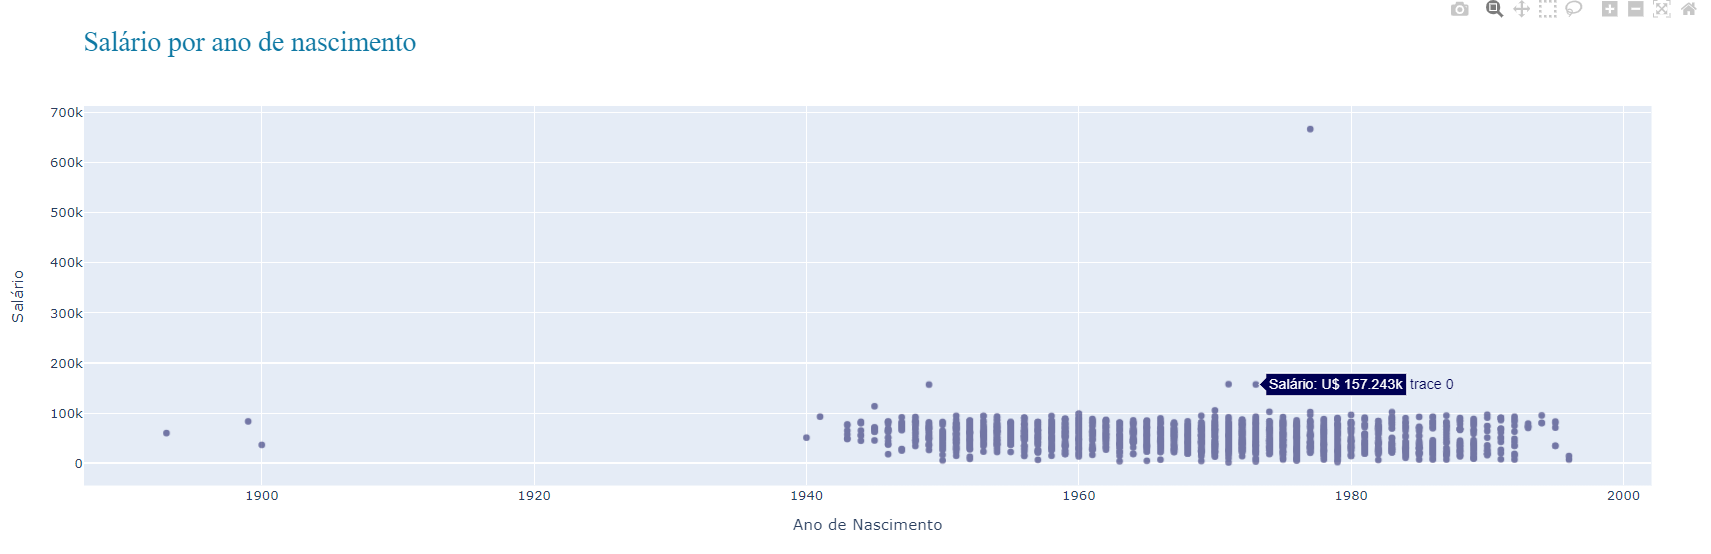

Note a diferença em algumas partes:

* O título do gráfico está com fonte, cor e tamanho diferentes.
* A cor e a opacidade dos marcadores estão diferentes
* Quando colocamos o mouse em cima de algum marcador, temos um template string que nos retorna `“Salário: U$ {salario}”`, ao invés de ser apenas o valor.

### **Gráficos de Barras**

Um dos gráficos mais utilizados durante uma EDA, devido à presença de variáveis qualitativas no dataset, permitindo-nos mesclar variáveis qualitativas com quantitativas.

#### Gráfico 1

In [ ]:
# definindo as variáveis
educational_level = df['Education'].value_counts().sort_values(ascending=True).index
quantity = df['Education'].value_counts().sort_values(ascending=True).values

# criando o gráfico com o graph_objs
barra = go.Bar(x = educational_level,
               y = quantity,
               marker = {'color':'#ff9f43'})

# definindo o layout
layout = go.Layout(title = "Quantidade de pessoas por nível educacional",
                   title_font = {'family':'Gotham','size':25, 'color':'#0e78a3'},
                   xaxis = {'title':'Nível Educacional'},
                   yaxis = {'title':'Quantidade de Pessoas'})
# criando a figura
fig = go.Figure(data=[barra], layout = layout)

# plotando o gráfico
py.iplot(fig)

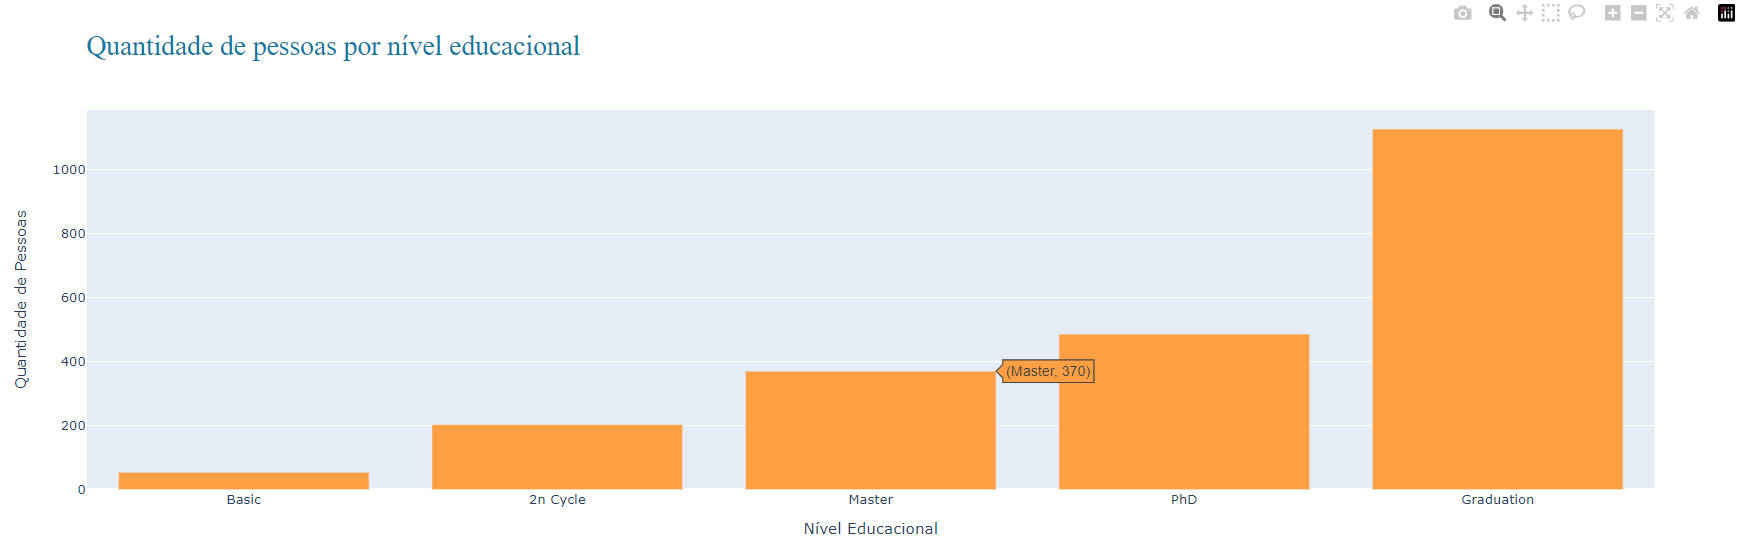

#### Gráfico 2

Vamos repetir esse gráfico de quantidade de pessoas por nível educacional, acrescentando a quantidade de pessoas solteiras e não solteiras.

In [ ]:
# definindo as variáveis - solteiros
educational_level_single = df[df['Marital_Status'] == 'Single']['Education'].value_counts(1).sort_values(ascending=True).index

quantity_single = df[df['Marital_Status'] == 'Single']['Education'].value_counts(1).sort_values(ascending=True).values

# definindo as variáveis - não solteiros
educational_level_notsingle = df[df['Marital_Status'] != 'Single']['Education'].value_counts(1).sort_values(ascending=True).index

quantity_notsingle = df[df['Marital_Status'] != 'Single']['Education'].value_counts(1).sort_values(ascending=True).values

In [ ]:
# criando o gráfico com o graph_objs - solteiros
barra_single = go.Bar(x = educational_level_single,
                      y = quantity_single,
                      marker = {'color':'#ff9f43'},
                      name = 'Solteiros',
                      hovertemplate = "Porcentagem: %{y:.3f}%")

# criando o gráfico com o graph_objs - não solteiros
barra_notsingle = go.Bar(x = educational_level_notsingle,
                      y = quantity_notsingle,
                      marker = {'color':'#feca57'},
                      name = 'Não solteiros',
                      hovertemplate = "Porcentagem: %{y:.3f}%")

# definindo o layout
layout = go.Layout(title = "Quantidade de pessoas por nível educacional",
                   title_font = {'family':'Gotham','size':25, 'color':'#0e78a3'},
                   xaxis = {'title':'Nível Educacional'},
                   yaxis = {'title':'Quantidade de Pessoas (%)'})
# criando a figura
fig = go.Figure(data=[barra_single, barra_notsingle], layout = layout)

# plotando o gráfico
py.iplot(fig)

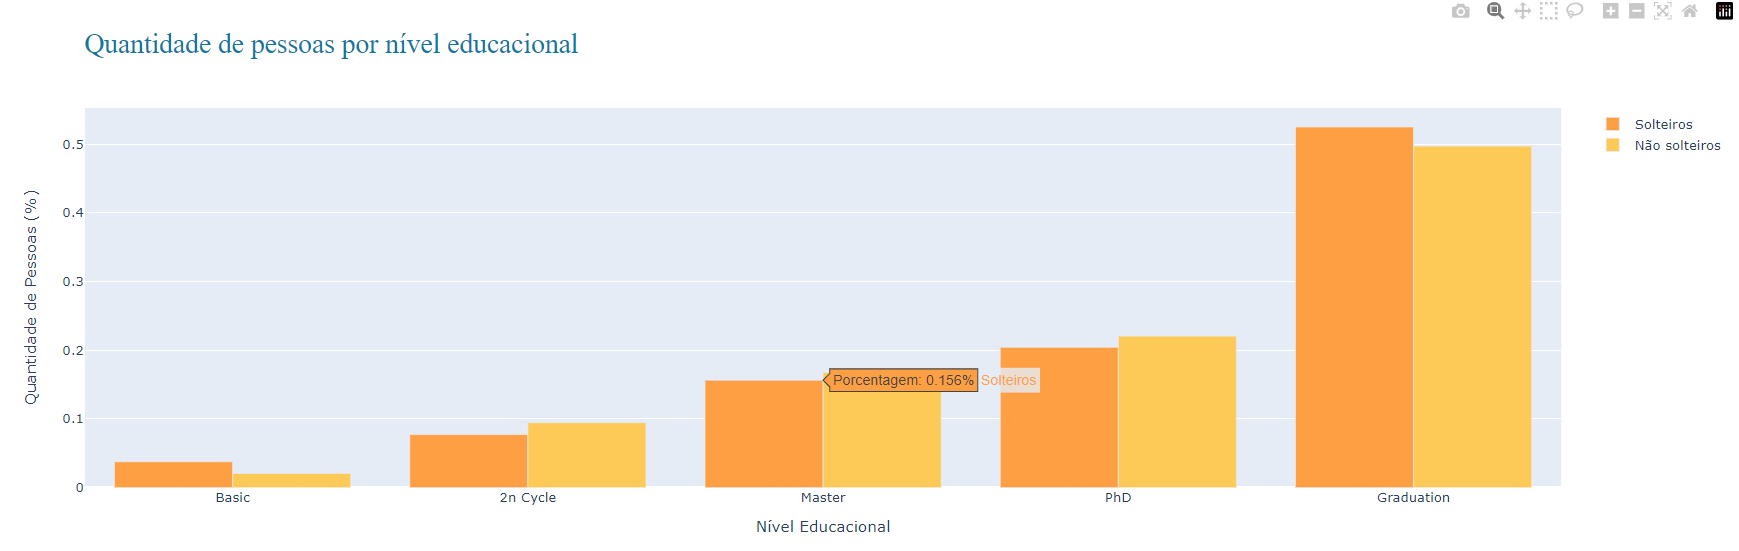

#### Gráfico 3

Mesma análise com um gráfico de barras diferente.

In [ ]:
# criando o gráfico com o graph_objs - solteiros
barra_single = go.Bar(x = educational_level_single,
                      y = quantity_single,
                      marker = {'color':'#ff9f43'},
                      name = 'Solteiros',
                      hovertemplate = "Porcentagem: %{y:.3f}%")

# criando o gráfico com o graph_objs - não solteiros
barra_notsingle = go.Bar(x = educational_level_notsingle,
                      y = quantity_notsingle,
                      marker = {'color':'#feca57'},
                      name = 'Não solteiros',
                      hovertemplate = "Porcentagem: %{y:.3f}%")

# definindo o layout
layout = go.Layout(title = "Quantidade de pessoas por nível educacional",
                   title_font = {'family':'Gotham','size':25, 'color':'#0e78a3'},
                   xaxis = {'title':'Nível Educacional'},
                   yaxis = {'title':'Quantidade de Pessoas (%)'},
                   barmode = 'stack')
# criando a figura
fig = go.Figure(data=[barra_single, barra_notsingle], layout = layout)

# plotando o gráfico
py.iplot(fig)

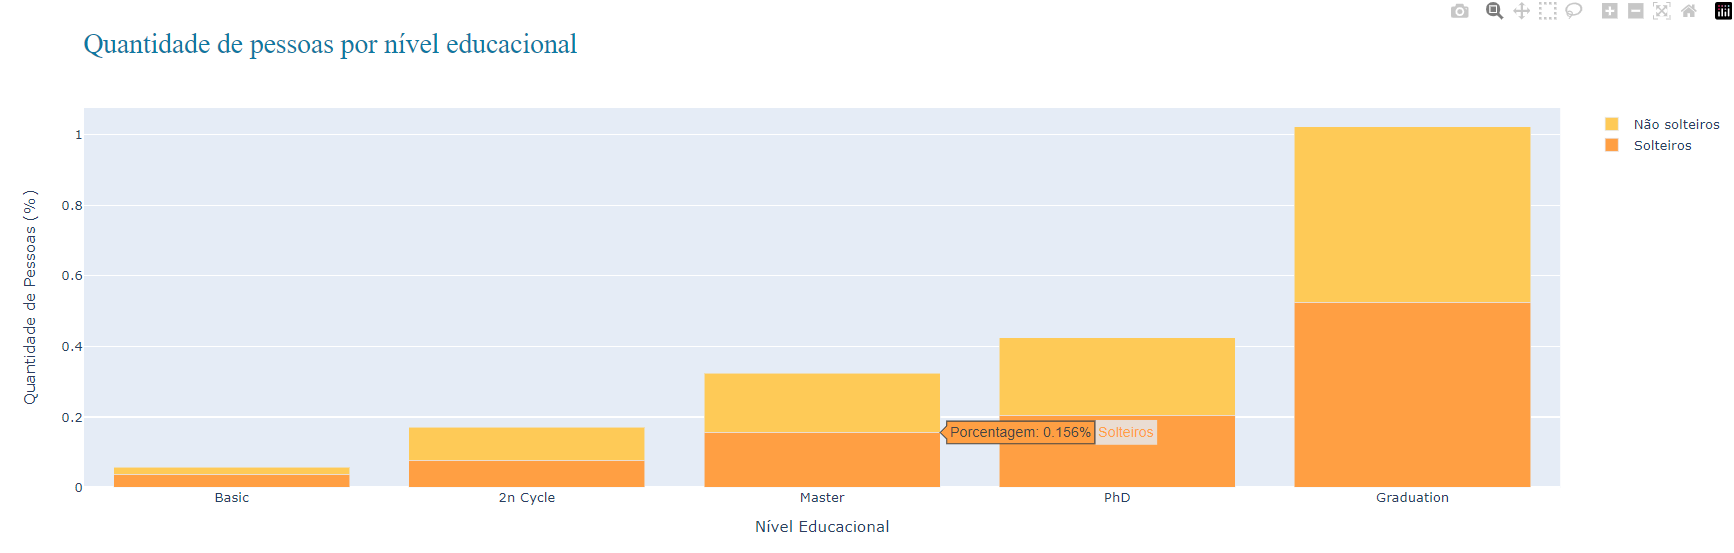

## Boxplot

Gráfico importante quando falamos de análise de outliers e da distribuição dos dados, no sentido de percentis.

In [ ]:
# criando o gráfico com o graph_objs
boxplot_2ncycle = go.Box(y = df.loc[df['Education'] == '2n Cycle', 'Income'],
                         marker = {'color':'#00CED1'}, name = '2n Cycle')
boxplot_basic = go.Box(y = df.loc[df['Education'] == 'Basic', 'Income'],
                         marker = {'color':'#FF6F61'}, name = 'Basic')
boxplot_graduation = go.Box(y = df.loc[df['Education'] == 'Graduation', 'Income'],
                         marker = {'color':'#FFD700'}, name = 'Graduation')
boxplot_master = go.Box(y = df.loc[df['Education'] == 'Master', 'Income'],
                         marker = {'color':'#C71585'}, name = 'Master')
boxplot_phd = go.Box(y = df.loc[df['Education'] == 'PhD', 'Income'],
                         marker = {'color':'#778899'}, name = 'PhD')

# definindo o layout
layout = go.Layout(title = "Quantidade de pessoas por nível educacional",
                   title_font = {'family':'Gotham','size':25, 'color':'#0e78a3'},
                   xaxis = {'title':'Nível Educacional'},
                   yaxis = {'title':'Quantidade de Pessoas (%)'},
                   barmode = 'stack')
# criando a figura
fig = go.Figure(data=[boxplot_2ncycle, boxplot_basic, boxplot_graduation, boxplot_master, boxplot_phd], layout = layout)

# plotando o gráfico
py.iplot(fig)

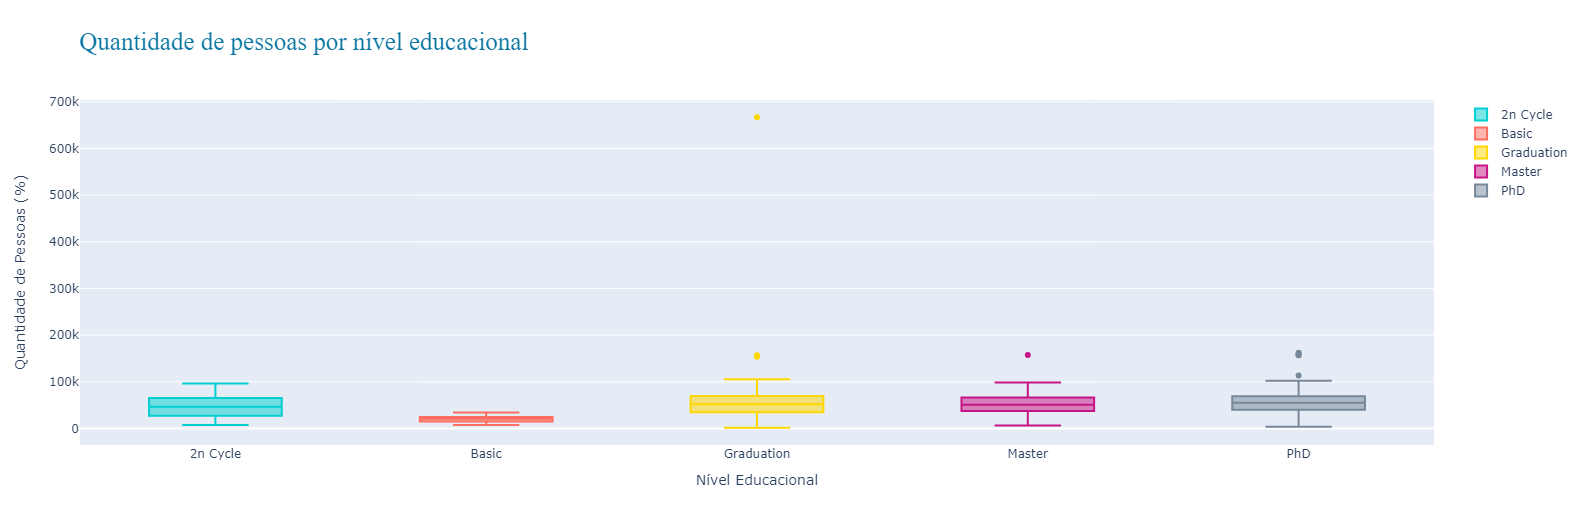

In [ ]:
# criando o gráfico com o graph_objs
boxplot_2ncycle = go.Box(y = df.loc[df['Education'] == '2n Cycle', 'Income'],
                         marker = {'color':'#00CED1'}, name = '2n Cycle')
boxplot_basic = go.Box(y = df.loc[df['Education'] == 'Basic', 'Income'],
                         marker = {'color':'#FF6F61'}, name = 'Basic')
boxplot_graduation = go.Box(y = df.loc[df['Education'] == 'Graduation', 'Income'],
                         marker = {'color':'#FFD700'}, name = 'Graduation')
boxplot_master = go.Box(y = df.loc[df['Education'] == 'Master', 'Income'],
                         marker = {'color':'#C71585'}, name = 'Master')
boxplot_phd = go.Box(y = df.loc[df['Education'] == 'PhD', 'Income'],
                         marker = {'color':'#778899'}, name = 'PhD')

# definindo o layout
layout = go.Layout(title = "Quantidade de pessoas por nível educacional",
                   title_font = {'family':'Gotham','size':25, 'color':'#0e78a3'},
                   xaxis = {'title':'Nível Educacional'},
                   yaxis = {'title':'Quantidade de Pessoas (%)'},
                   barmode = 'stack')
# criando a figura
fig = go.Figure(data=[boxplot_2ncycle, boxplot_basic, boxplot_graduation, boxplot_master, boxplot_phd], layout = layout)

# plotando o gráfico
py.iplot(fig)

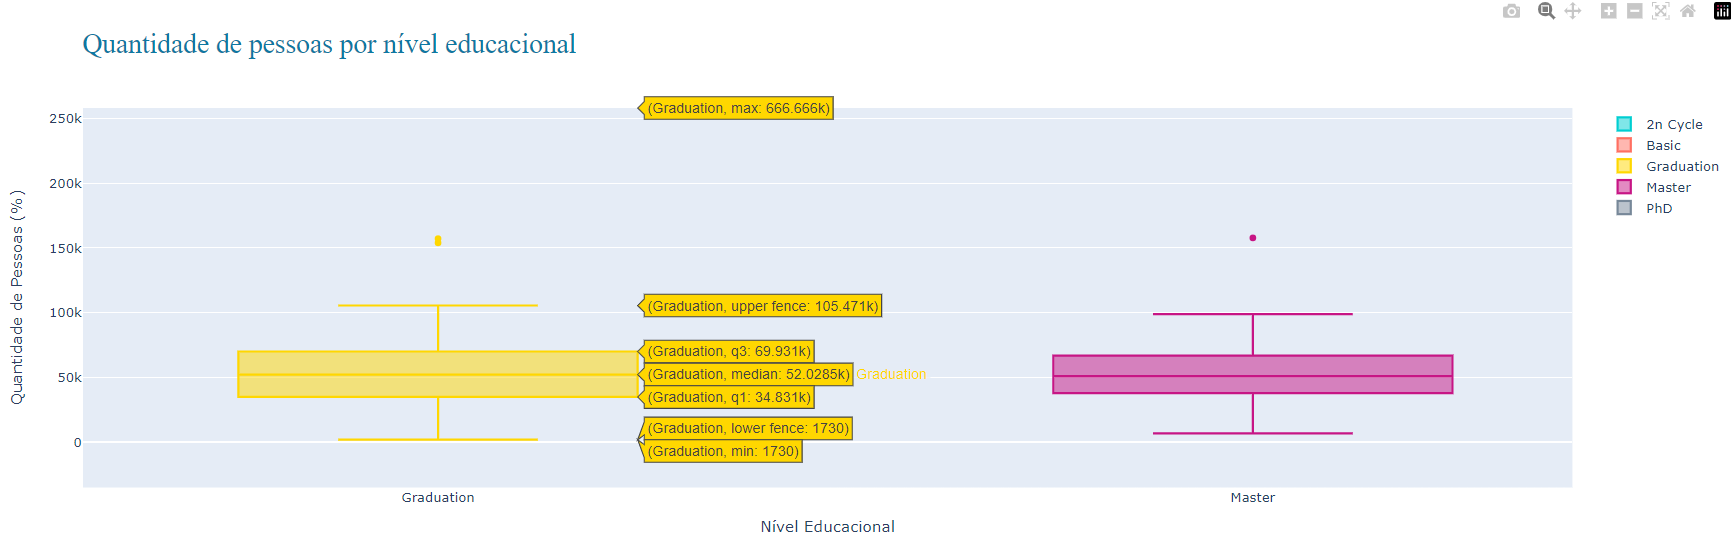

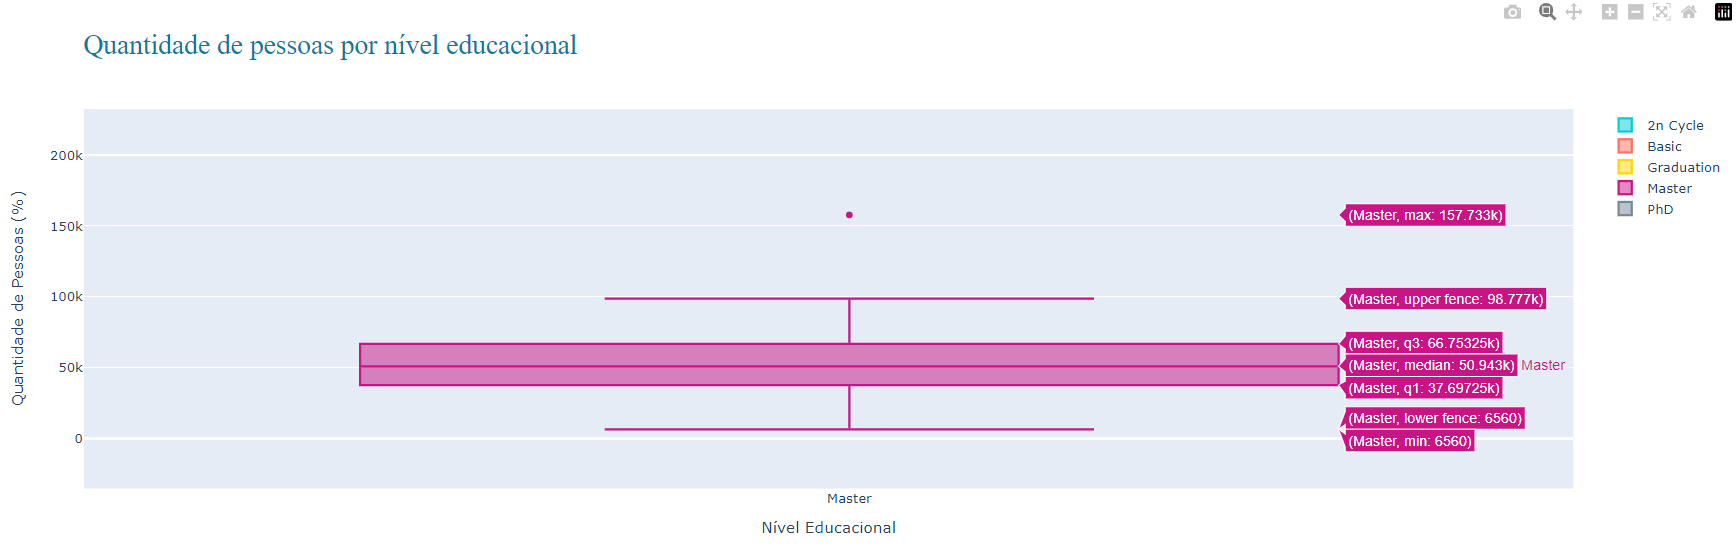

Obs.: com o upload do notebook no github o gráfico do plotly não aparece, entretanto, anexei prints junto ao gráfico para que possa ser visualizado.